# <center> Мини-отчёт по анализу 
# <center> основных причин оттока клиентов банка

In [249]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import seaborn as sns


import plotly
import plotly.express as px


#### В таблице представлены данные об оттоке клиентов банка.

In [250]:
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop('RowNumber', axis=1)

churn_data.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Столбцы таблицы:

- CustomerId — идентификатор клиента
- Surname — фамилия клиента
- CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
- Geography — страна клиента (банк международный)
- Gender — пол клиента
- Age — возраст клиента
- Tenure — сколько лет клиент пользуется услугами банка
- Balance — баланс на счетах клиента в банке
- NumOfProducts — количество услуг банка, которые приобрёл клиент
- HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
- IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
- EstimatedSalary — предполагаемая заработная плата клиента
- Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

### <center> Итак, нам нужно найти ответы на следующие вопросы:

##### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

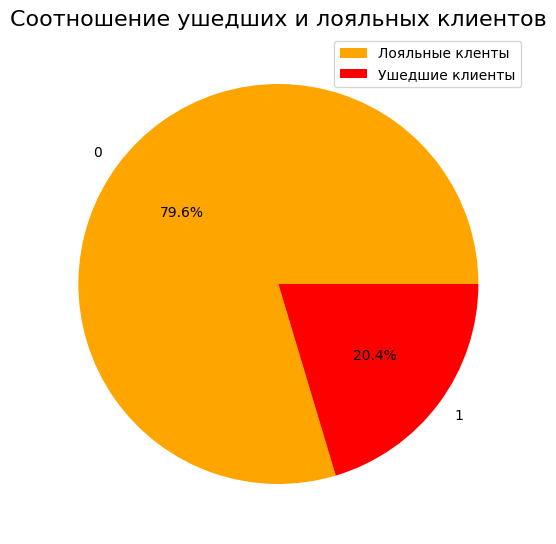

In [251]:
# Поскольку статус лояльности является категориальным статическим признаком, для визуализации выберем круговую диаграму: 
exited = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.pie(
    exited,
    labels=exited.index,
    autopct='%.1f%%',
    colors=['orange', 'red']
);

axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)
axes.legend(['Лояльные кленты', 'Ушедшие клиенты'])

Очевидно, количество лояльных клиентов банка значительно больше, чем ушедших. Однако, процент ушедших клиентов всё же слишком велик и необходимо выяснить причины их ухода. 

##### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

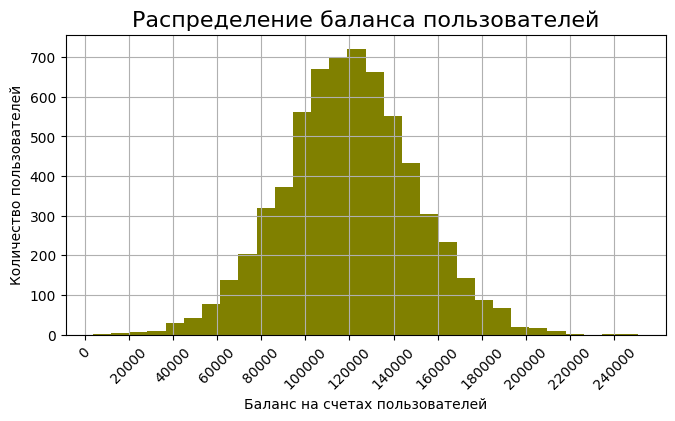

In [252]:
# Для визуализации распределения подходит гистограмма:
balance = churn_data[churn_data['Balance'] > 2500]

fig = plt.figure(figsize=(6, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(x=balance['Balance'],
             label=['Баланс'], 
             color='olive', 
             bins = 30)
axes.set_title('Распределение баланса пользователей', fontsize=16);
axes.set_xticks(range(0, 250000, 20000))
axes.xaxis.set_tick_params(rotation=45)
axes.set_xlabel('Баланс на счетах пользователей')
axes.set_ylabel('Количество пользователей')
axes.grid()



Получившаяся гистограмма имеет форму нормального распределения. 
Более половины счетов с балансом в диапазоне от 90 000 до 150 000. 
Более 700 пользователей хранят на своих счетах от 120 000 до 130 000.

##### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

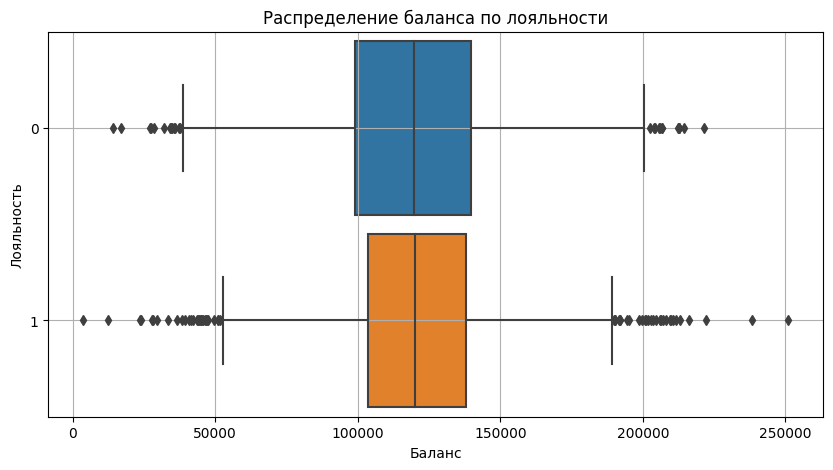

In [253]:
# Для решения этой задачи воспользуемся "ящиком с усами":
fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=balance,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса по лояльности')
boxplot.set_xlabel('Баланс')
boxplot.set_ylabel('Лояльность')
boxplot.grid();

На основании полученного графика можно сделать вывод, что лояльность клиентов практически не зависит от сумм на их счетах. Медианы распределений совпадают, да и ширина коробки и тех и других сопоставимы. Интересны "выбросы" в распределении ушедших клиентов: во-первых, их значительно больше, во-вторых, шире их распределение, чем у лояльных клиентов. Возможно, стоит отдельно изучить ушедших клиентов с балансом до 50000 и от 180000.

#### 9.4 Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

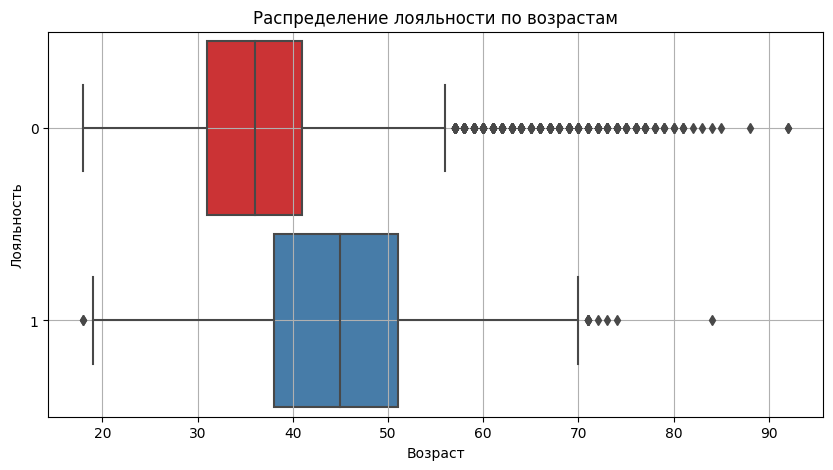

In [254]:
fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9,
    palette="Set1"
)
boxplot.set_title('Распределение лояльности по возрастам')
boxplot.set_xlabel('Возраст')
boxplot.set_ylabel('Лояльность')
boxplot.grid();

Основной пул лояльных клиентов в возрасте от 30 до 40 лет, в то время как возраст ушедших сосредоточен в интервале от 40 до 50 лет. Если медиана лояльных пользователей - это возраст 36 лет, то медиана ушедших также смещена в сторону значительно старшего возраста, около 45 лет. Также обращает на себя внимание значительно большее количество "выбросов" в категории лояльных клиентов.
Банку стоит уделить внимание клиентам от 40 до 50 лет.

#### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

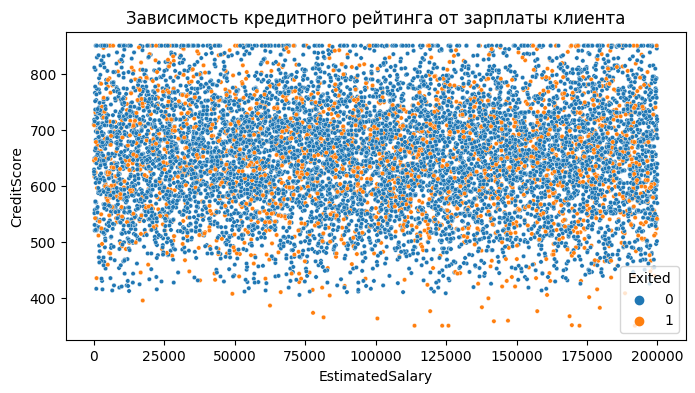

In [255]:
# Для выявления взаимосвязи двух признаков используем диаграму рассеивания.

fig = plt.figure(figsize=(8, 4))
axes = sns.scatterplot(
    data=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited',
    s=10,
    sizes=(50, 50)
    )

axes.set_title('Зависимость кредитного рейтинга от зарплаты клиента');



Из графика можно сделать вывод, что вне зависимости от предполагаемой зарплаты с рейтингом менее 400 обнаруживаются только ушедшие клиенты.
Взаимосвязи же между кредитной историей и зарплатой не выявлено.

#### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

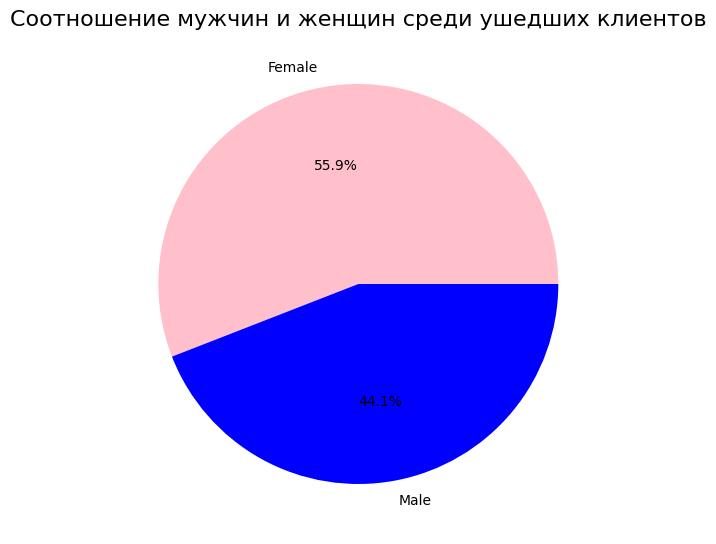

In [256]:
gender = churn_data[churn_data['Exited'] == 1]['Gender'].value_counts()

fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.pie(
    gender,
    labels=gender.index,
    autopct='%.1f%%',
    colors=['pink','blue']
)

axes.set_title('Соотношение мужчин и женщин среди ушедших клиентов', fontsize=16);



Женщины покидают банк несколько чаще мужчин.

#### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

На это задание я уже потратил более 12 часов, но так и не справился. Буду признателен, если объясните в комментарии, как нужно было его выполнить. Спасибо.

#### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

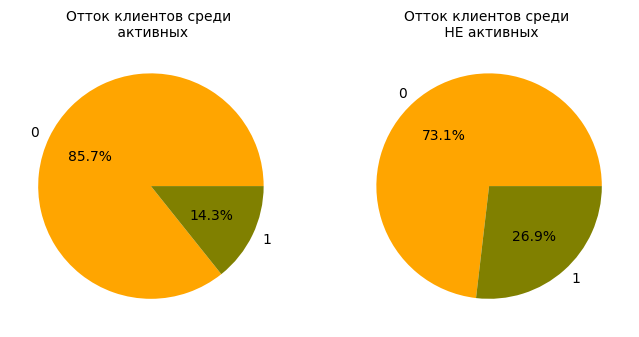

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

activ = churn_data[churn_data['IsActiveMember'] == 1]['Exited'].value_counts()
axes[0].pie(
    activ,
    labels=activ.index,
    autopct='%.1f%%',
    colors=['orange', 'olive']
)
axes[0].set_title('Отток клиентов среди \n активных', fontsize=10)

non_activ = churn_data[churn_data['IsActiveMember'] == 0]['Exited'].value_counts()
axes[1].pie(
    non_activ,
    labels=non_activ.index,
    autopct='%.1f%%',
    colors=['orange', 'olive']
)
axes[1].set_title('Отток клиентов среди \n НЕ активных', fontsize=10);


Как видно из диаграммы, статус активности связан с лояльностью клиентов: среди активных пользователей ушедших гораздо меньше. Банку можно порекомендовать добиваться большей активности своих клиентов (снизить процентную ставку по кредитной карте, например, чтобы ей чаще можно было расплачиваться, не переживая, что увязнешь в долгах, разработать программу кэшбэка, предложить клиентам более прозрачные и доступные кредитные продукты, естественно, чтоб не в убыток банку!).

#### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
map_exited = churn_data.groupby(
    by='Geography',
    as_index=False
)['Exited'].mean()

fig = px.choropleth(
    data_frame=map_exited, 
    locations="Geography", 
    locationmode = "country names", 
    color="Exited", 
    range_color=[0, 1],
    title='Доля ушедших клиентов по странам', 
    width=800, 
    height=500, 
    color_continuous_scale='Reds' 
)

fig.show()

Почти треть клиентов в Германии покинули банк, в то время как во Франции и Испании пользователи оказались значительно более лояльными. Возможно, это связано с менталитетом немцев, которых отличает большая педантичность и пунктуальность. Может быть у банка проблемы с качеством и своевременностью транзакций, или сотрудники в отделениях опаздывают с открытием или закрываются раньше срока.

#### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
##### Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
##### На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

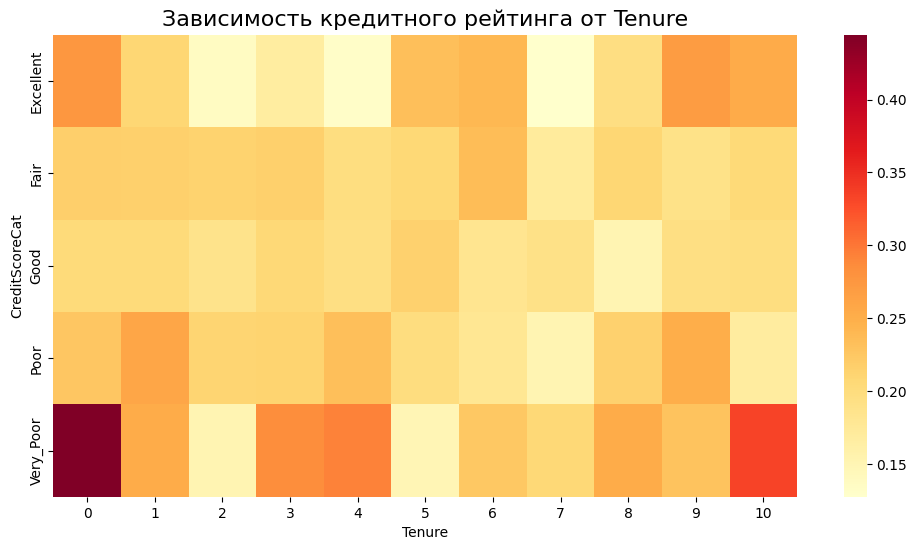

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

fig = plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(data=pivot, cmap='YlOrRd')
heatmap.set_title('Зависимость кредитного рейтинга от Tenure', fontsize=16);


Судя по карте, чаще всего покидают банк клиенты с самым низким кредитным рейтингом, пользующиеся услугами банка менее года. Однако, стоит заметить, что на втором месте находится процент ушедших среди наиболее давних клиентов банка с худшей кредитной историей. Итак, похоже, чем хуже кредитная история, тем больше вероятность ухода клиента. Возможно банк слишком часто прибегает к помощи коллекторских контор?)))